BloomTech Data Science

*Unit 2, Sprint 2, Module 4*

---

# Module Project: Classification Metrics

This week, the module projects will focus on creating and improving a model for the Tanazania Water Pump dataset. Your goal is to create a model to predict whether a water pump is functional, non-functional, or functional needs repair.


## Directions

The tasks for this project are as follows:

- **Task 1:** Use `wrangle` function to import training and test data.
- **Task 2:** Split training data into feature matrix `X` and target vector `y`.
- **Task 3:** Split training data into training and validation sets.
- **Task 4:** Establish the baseline accuracy score for your dataset.
- **Task 5:** Build `model`.
- **Task 6:** Calculate the training and validation accuracy score for your model.
- **Task 7:** Plot the confusion matrix for your model.
- **Task 8:** Print the classification report for your model.
- **Task 9:** Identify likely `'non-functional'` pumps in the test set.
- **Task 10:** Find likely `'non-functional'` pumps serving biggest populations.
- **Task 11 (`stretch goal`):** Plot pump locations from Task 10.

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `pandas-profiling`
- `plotly`
- `sklearn`


# I. Wrangle Data

In [1]:
%%capture
!pip install category_encoders==2.*

In [2]:
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive/Kaggle

!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle
2023-01-02_1920_submission.csv	    kaggle.json		   test_features.csv
2023-01-04_1727_submission.csv	    model_rf_rs_80	   train_features.csv
2_new_submission.csv		    new_submission.csv	   train_labels.csv
bloomtech-water-pump-challenge.zip  sample_submission.csv


In [4]:
def wrangle(fm_path, tv_path=None):
    if tv_path:
        df = pd.merge(pd.read_csv(fm_path, 
                                  na_values=[0, -2.000000e-08]),
                      pd.read_csv(tv_path)).set_index('id')
    else:
        df = pd.read_csv(fm_path, 
                         na_values=[0, -2.000000e-08],
                         index_col='id')

    # Drop constant columns
    df.drop(columns=['recorded_by'], inplace=True)

    # Drop HCCCs
    cutoff = 100
    drop_cols = [col for col in df.select_dtypes('object').columns
                 if df[col].nunique() > cutoff]
    df.drop(columns=drop_cols, inplace=True)

    # Drop duplicate columns
    dupe_cols = [col for col in df.head(100).T.duplicated().index
                 if df.head(100).T.duplicated()[col]]
    df.drop(columns=dupe_cols, inplace=True)             

    return df

**Task 1:** Using the above `wrangle` function to read `train_features.csv` and `train_labels.csv` into the DataFrame `df`, and `test_features.csv` into the DataFrame `X_test`.

In [5]:
df = wrangle(fm_path='train_features.csv',
             tv_path='train_labels.csv')
X_test = wrangle(fm_path='test_features.csv')

# II. Split Data

**Task 2:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'status_group'`.

In [6]:
target = 'status_group'
X = df.drop(columns=target)
y = df[target]

**Task 3:** Using a randomized split, divide `X` and `y` into a training set (`X_train`, `y_train`) and a validation set (`X_val`, `y_val`).

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

# III. Establish Baseline

**Task 4:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents.

In [8]:
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5425489938182296


# IV. Build Models

**Task 5:** Build and train your `model`. Include the transformers and predictor that you think are most appropriate for this problem.

In [9]:
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, max_depth=25 )
)
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type',
                                      'waterpoin...
                                          'mapping': hand pump                      1
communal standpipe             2
communal standpipe multiple    3
improved spring                4
other                          5
cattle trou

# V. Check Metrics

**Task 6:** Calculate the training and validation accuracy scores for `model`.

In [10]:
training_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)

print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.9874523214520584
Validation Accuracy Score: 0.79503367003367


**Task 7:** Plot the confusion matrix for your model, using your validation data.

**Note:** Since there are three classes in your target vector, the dimensions of your matrix will be 3x3.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


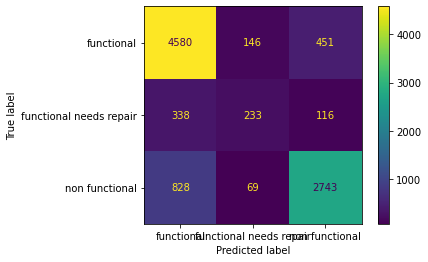

In [11]:
# Plot 3x3 confusion matrix
plot_confusion_matrix(model, X_val, y_val)

Calculating precision and recall for a multiclass problem is a bit of a mess. Fortunately, we can use `sklearn`'s classification report.

**Task 8:**  Print the classification report for your `model`, using your validation data.

In [12]:
# Print classification report 
print(classification_report(
    y_val,
    model.predict(X_val)

))

                         precision    recall  f1-score   support

             functional       0.80      0.88      0.84      5177
functional needs repair       0.52      0.34      0.41       687
         non functional       0.83      0.75      0.79      3640

               accuracy                           0.80      9504
              macro avg       0.72      0.66      0.68      9504
           weighted avg       0.79      0.80      0.79      9504



# VI. Tune Model

Usually, we use this part of the ML workflow to adjust the hyperparameters of the our model to increase performance based on metrics like accuracy. Today, we'll use it to help maximize the impact of our water pump repairs when resources are scarce. What if we only had funds to repair 100 water pumps?

(This activity is based on a [post](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050) by Lambda alum Michael Brady.)

**Task 9:** Using your model's `predict_proba` method, identify the observations in your **test set** where the model is more than 95% certain that a pump is `'non-functional'`. Put these observations in the DataFrame `X_test_nf`.

In [13]:
model.predict_proba(X_val)[:,-1]

array([0.21343507, 0.99      , 0.7293346 , ..., 0.96121732, 0.67459023,
       0.73539827])

In [16]:
data = {'y_val': y_val,
        'y_pred_proba': model.predict_proba(X_val)[:,-1]}

result = pd.DataFrame(data)

mask = result['y_pred_proba']>.95
result[mask]

,y_val,y_pred_proba
id,,
16772.0,non functional,0.990000
4125.0,non functional,0.990000
12693.0,non functional,0.998051
20316.0,non functional,1.000000
47873.0,non functional,0.988889
...,...,...
3405.0,non functional,1.000000
72478.0,non functional,0.960000
2254.0,functional needs repair,1.000000


In [34]:
X_test_nf = result[mask]
X_test_nf

,y_val,y_pred_proba
id,,
16772.0,non functional,0.990000
4125.0,non functional,0.990000
12693.0,non functional,0.998051
20316.0,non functional,1.000000
47873.0,non functional,0.988889
...,...,...
3405.0,non functional,1.000000
72478.0,non functional,0.960000
2254.0,functional needs repair,1.000000


In [33]:
df.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,...,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
454.0,50.0,2092.0,35.426020,-4.227446,NaN,Internal,Manyara,21,1.0,160.0,...,per bucket,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
510.0,NaN,NaN,35.510074,-5.724555,NaN,Internal,Dodoma,1,6.0,NaN,...,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
14146.0,NaN,NaN,32.499866,-9.081222,NaN,Lake Rukwa,Mbeya,12,6.0,NaN,...,never pay,soft,good,enough,shallow well,shallow well,groundwater,other,other,non functional
47410.0,NaN,NaN,34.060484,-8.830208,NaN,Rufiji,Mbeya,12,7.0,NaN,...,monthly,soft,good,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
1288.0,300.0,1023.0,37.032690,-6.040787,NaN,Wami / Ruvu,Morogoro,5,1.0,120.0,...,on failure,salty,salty,enough,shallow well,shallow well,groundwater,other,other,non functional


In [35]:
final_ = X_test_nf.merge(df, right_index=True, left_index=True)

In [36]:
final_.head()

,y_val,y_pred_proba,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,...,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
16772.0,non functional,0.990000,NaN,313.0,38.930847,-10.557977,NaN,Ruvuma / Southern Coast,Mtwara,90,...,never pay,soft,good,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
4125.0,non functional,0.990000,NaN,1907.0,31.670500,-8.135057,NaN,Lake Rukwa,Rukwa,15,...,never pay,soft,good,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
12693.0,non functional,0.998051,NaN,NaN,33.319185,-2.821009,NaN,Lake Victoria,Mwanza,19,...,never pay,soft,good,enough,shallow well,shallow well,groundwater,other,other,non functional
20316.0,non functional,1.000000,NaN,1329.0,37.679327,-3.711402,NaN,Pangani,Kilimanjaro,3,...,never pay,soft,good,insufficient,spring,spring,groundwater,other,other,non functional
47873.0,non functional,0.988889,NaN,NaN,NaN,NaN,NaN,Lake Victoria,Mwanza,19,...,never pay,soft,good,insufficient,lake,river/lake,surface,communal standpipe,communal standpipe,non functional


**Task 10:** Limit `X_test_nf` to the 100 pumps with the largest associated populations.

# VII. Communicate Results

**Task 11 (`stretch goal`):** Create a scatter plot with the location of the 100 pumps in `X_test_nf`.

**Note:** If you want to make this a **`super stretch goal`**, create a Mapbox scatter plot using [Plotly](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html).

In [40]:
import matplotlib.pyplot as plt


In [38]:
plot_this = final_.sort_values(by= 'population', ascending = False).head(100)

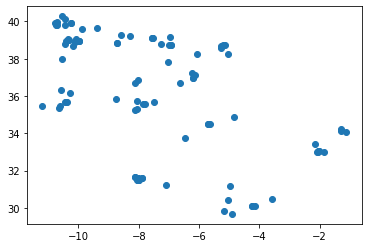

In [42]:
plt.scatter(plot_this['latitude'], plot_this['longitude'])